#Import Libaray

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

#Data Understanding

In [ ]:
df = pd.read_csv('electricityConsumptionAndProductioction.csv')

In [ ]:
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       36772 non-null  object
 1   Consumption    36772 non-null  int64 
 2   Production     36772 non-null  int64 
 3   Nuclear        36772 non-null  int64 
 4   Wind           36772 non-null  int64 
 5   Hydroelectric  36772 non-null  int64 
 6   Oil and Gas    36772 non-null  int64 
 7   Coal           36772 non-null  int64 
 8   Solar          36772 non-null  int64 
 9   Biomass        36772 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.8+ MB


In [ ]:
df.isnull().sum()

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Consumption,36772.0,6707.924889,1034.961146,4081.0,5895.75,6686.0,7434.00,9615.0
Production,36772.0,6543.770478,1005.486125,3315.0,5833.00,6492.0,7210.00,9886.0
Nuclear,36772.0,1293.468590,237.348752,612.0,1349.00,1386.0,1409.00,1457.0
Wind,36772.0,785.700723,681.508967,-26.0,226.00,577.0,1195.25,2811.0
Hydroelectric,36772.0,1801.603149,678.981785,175.0,1310.00,1708.0,2184.00,4359.0
Oil and Gas,36772.0,1181.630017,422.487653,213.0,881.00,1216.0,1502.00,2141.0
Coal,36772.0,1270.038236,306.550193,279.0,1080.00,1254.0,1467.00,2537.0
Solar,36772.0,151.524094,222.768784,0.0,0.00,2.0,268.00,869.0
Biomass,36772.0,58.730828,13.363835,18.0,49.00,61.0,68.00,89.0


In [ ]:
df = df.set_index("DateTime")
df.index = pd.to_datetime(df.index)

In [ ]:
df.shape

(36772, 9)

#EDA

##Plotting of Individual Power Consumption and Power Production

###Power Consumption over Time

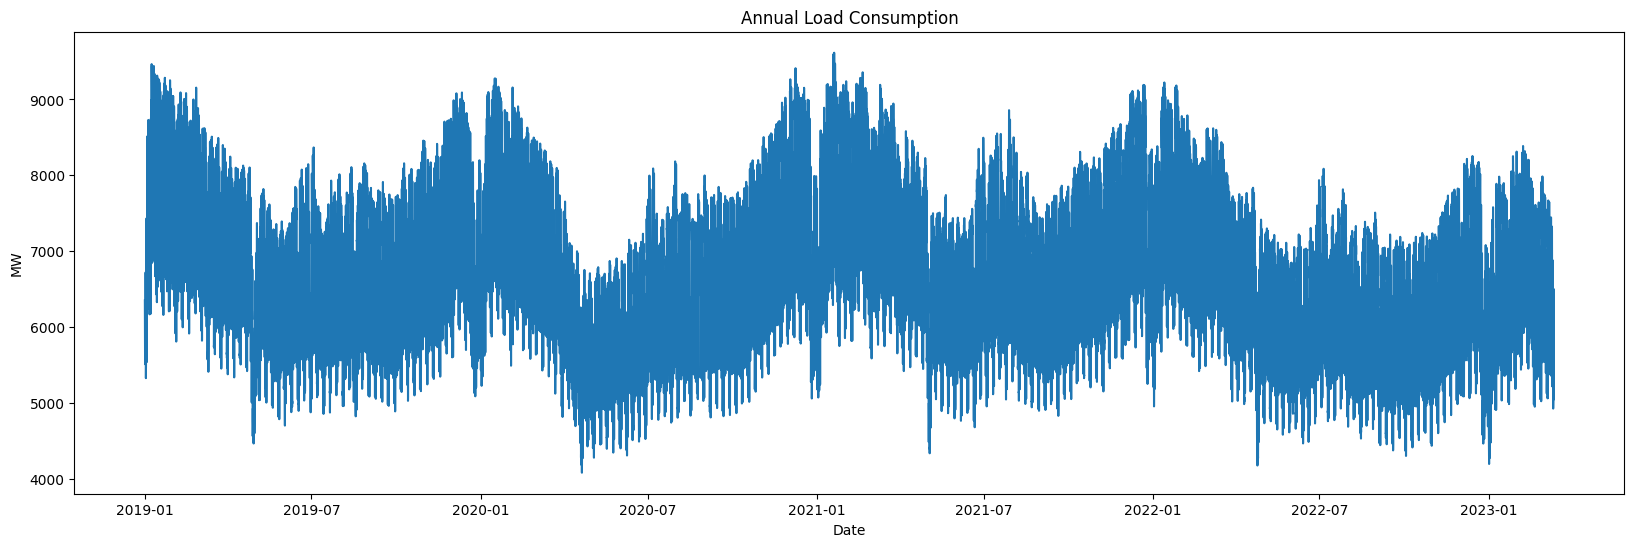

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df.index, df['Consumption'])
plt.title('Power Consumption according to Time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.title('Annual Load Consumption')
plt.show()

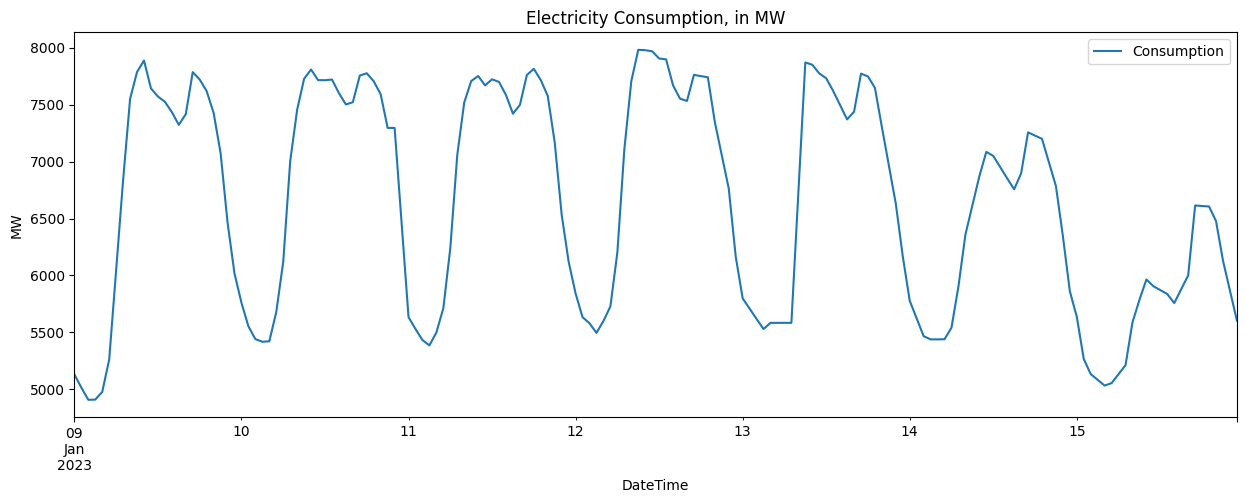

In [ ]:
df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"][["Consumption"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption, in MW")
plt.ylabel('MW')
plt.show()

###Power Production over Time

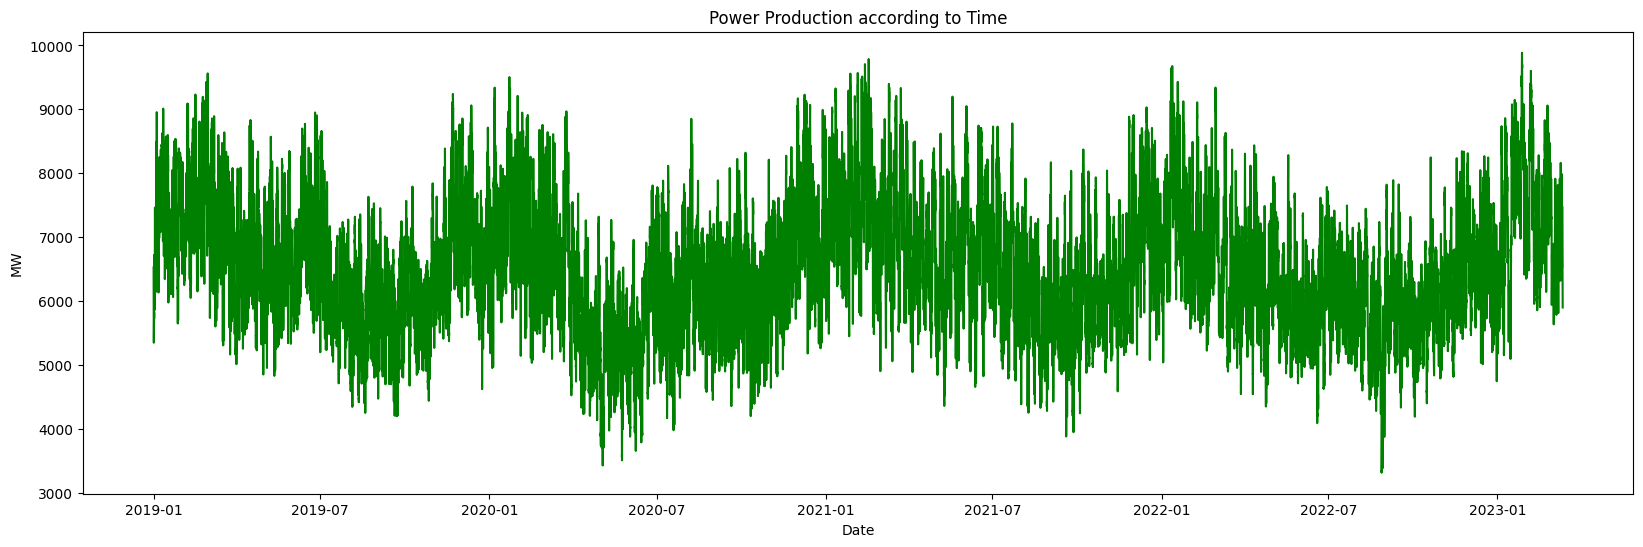

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df.index, df['Production'], 'g')
plt.title('Power Production according to Time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.show()

#Power Production vs Consumption over Time

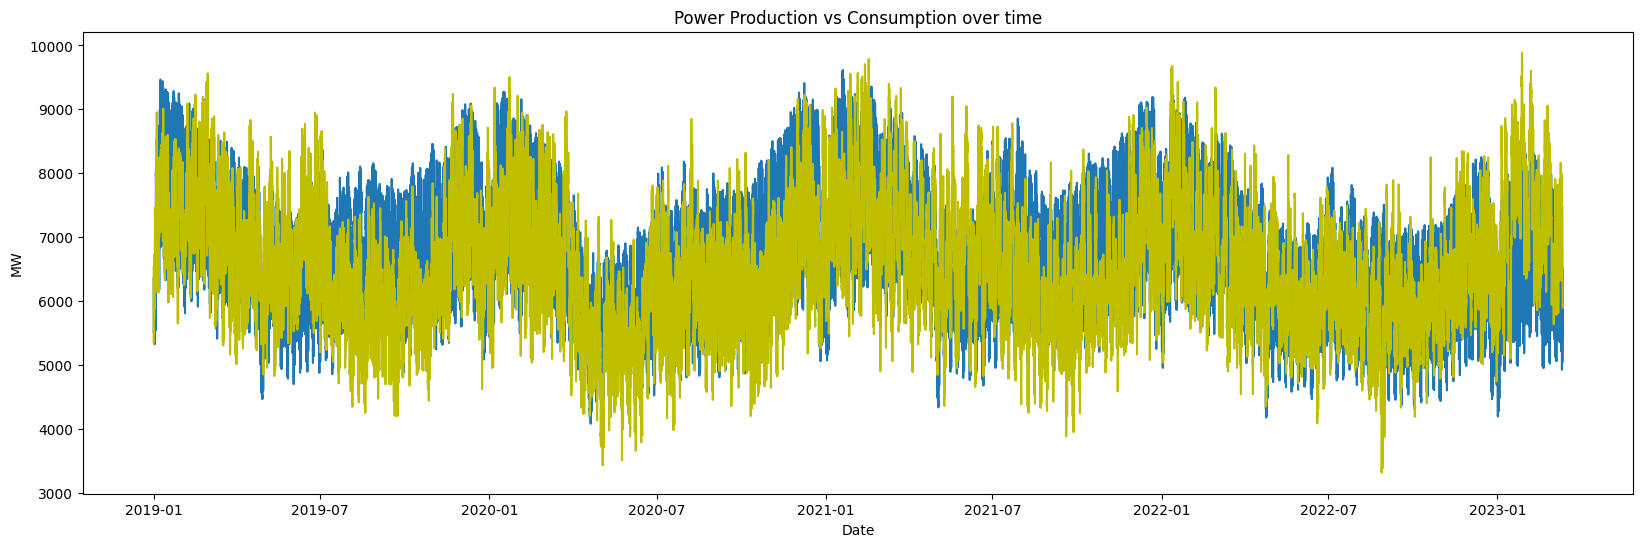

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df.index, df['Consumption'])
plt.plot(df.index, df['Production'], 'y')
plt.title('Power Production vs Consumption over time')
plt.xlabel('Date')
plt.ylabel('MW')
plt.show()

setelah melakukan analisis eksporatif data, memiliki pola musiman

In [ ]:
Types = list(df.columns)
Types.pop(0)
Types.pop(0)
Types

['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

In [ ]:
colors = {'Nuclear':'orange', 'Wind':'aquamarine', 'Hydroelectric':'b', 'Oil and Gas':'saddlebrown', 'Coal':'black', 'Solar':'y', 'Biomass':'crimson'}

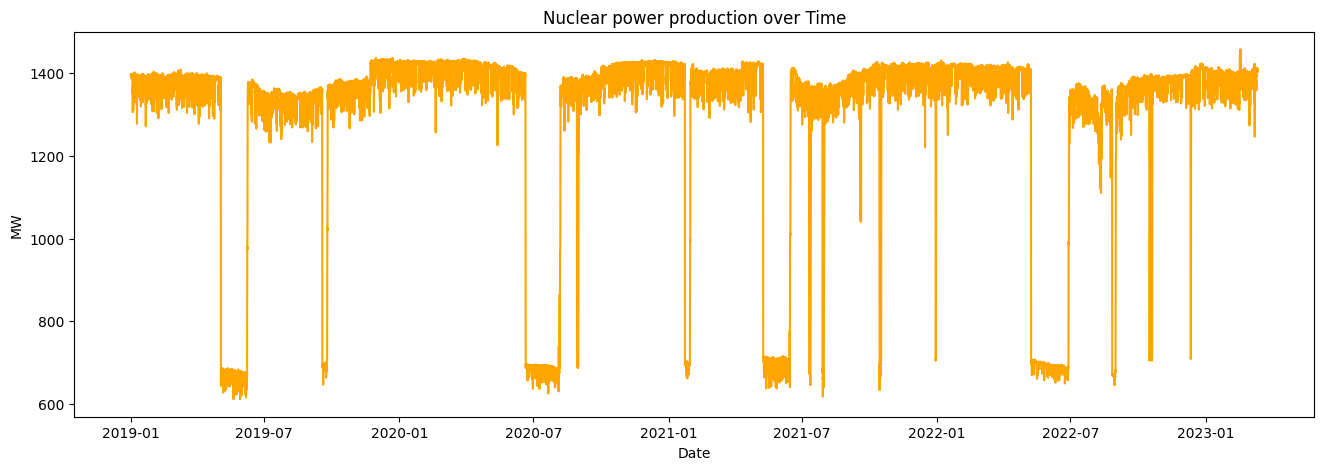

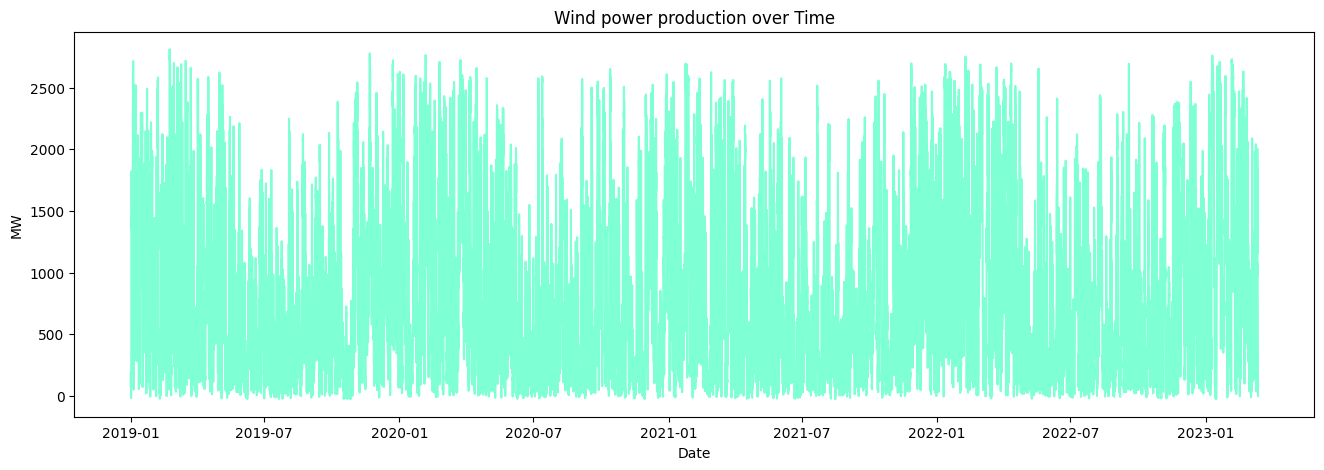

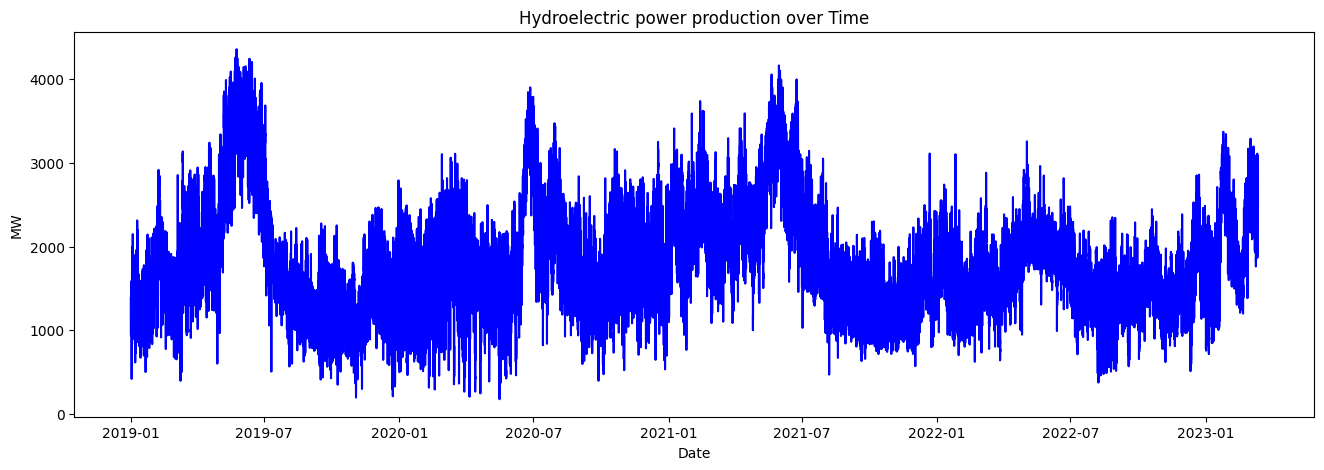

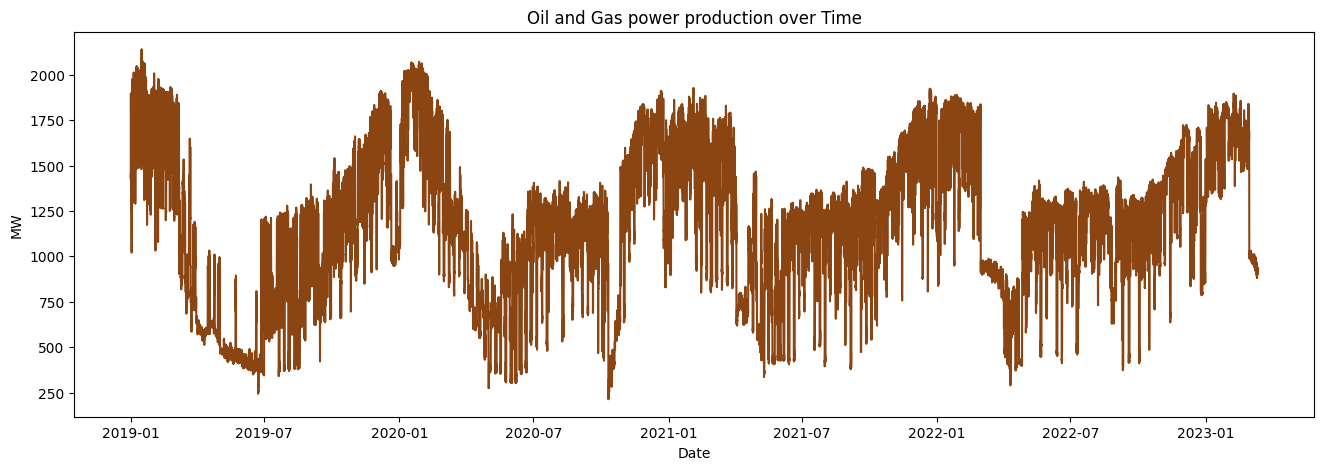

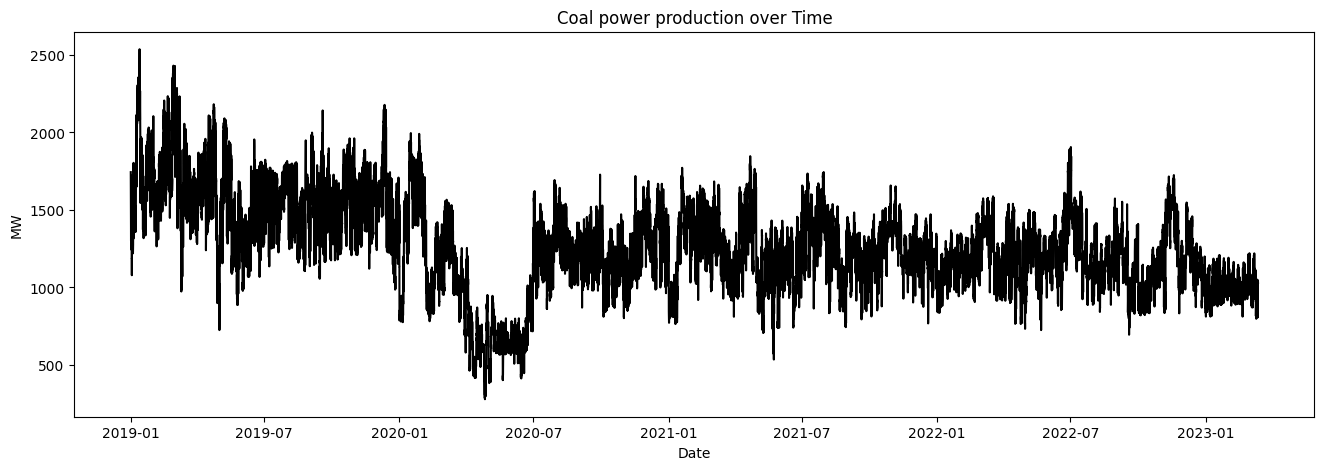

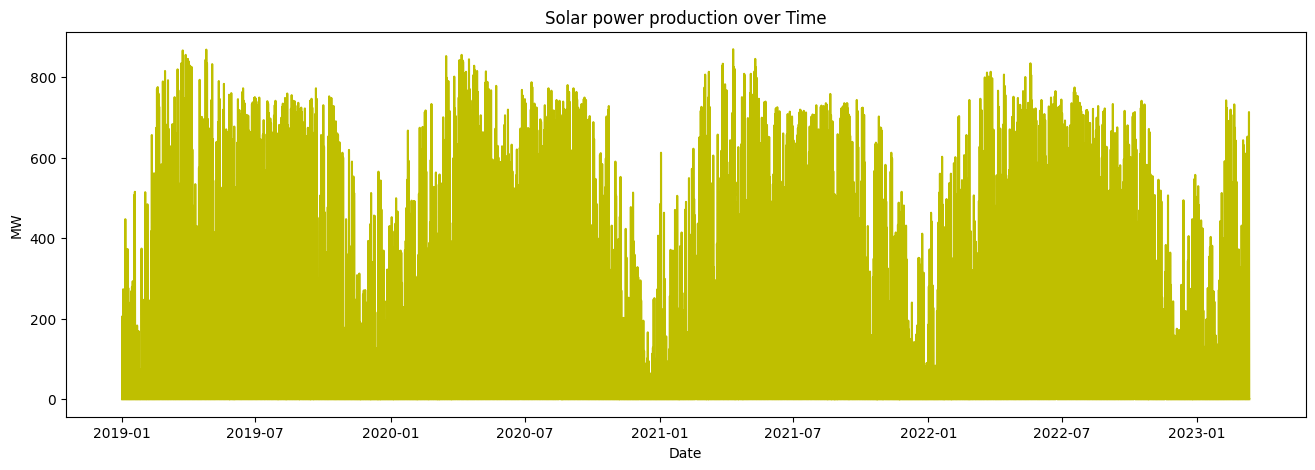

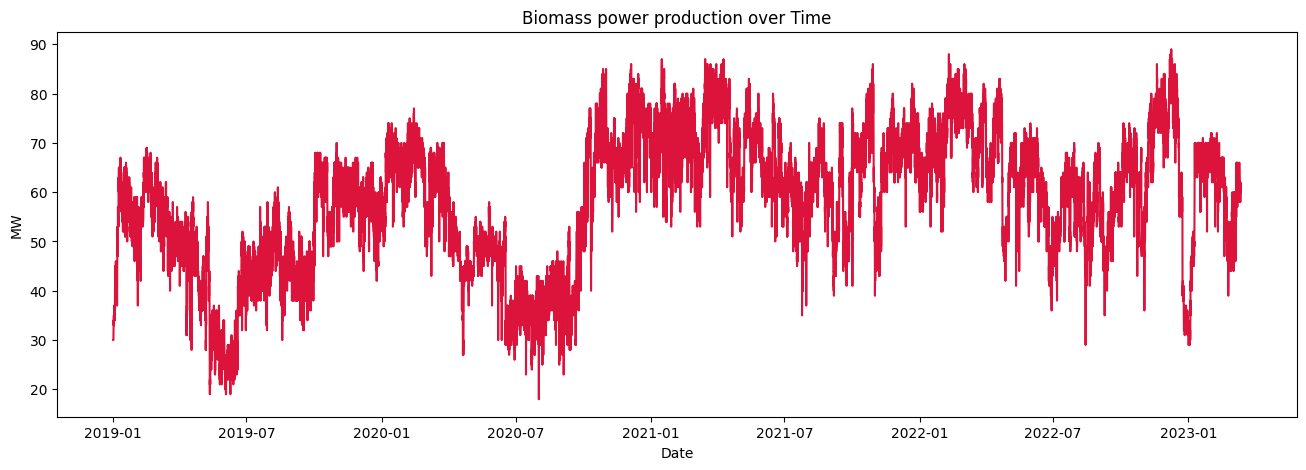

In [ ]:
for prType in Types:
    plt.figure(figsize=(16,5))
    plt.plot(df.index, df[prType], color=colors.get(prType))
    plt.title(f'{prType} power production over Time')
    plt.xlabel('Date')
    plt.ylabel('MW')
    plt.show()

#Individual DateTime attributes like Year, Month, Day and Week of the Day

In [ ]:
df["hour"] = df.index.hour
df["day_of_week"] = df.index.day_name()
df["quarter"] = df.index.quarter
df["month"] = df.index.month_name()
df["year"] = df.index.year



##Power Consumption by Hour

In [ ]:
dfbyHour = df.groupby('hour').mean()

<ipython-input-17-f78f869dd78c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfbyHour = df.groupby('hour').mean()


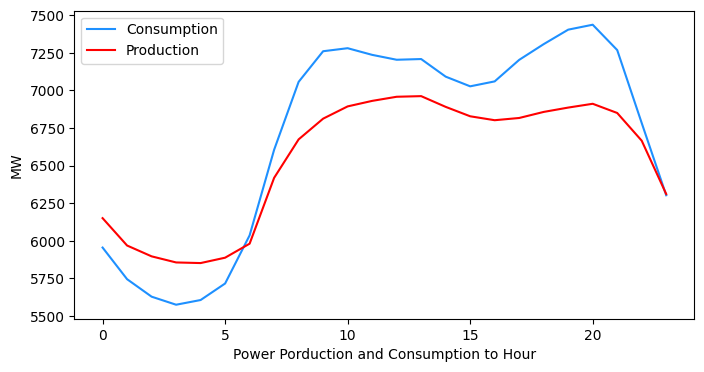

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(dfbyHour.index, dfbyHour['Consumption'], 'dodgerblue')
plt.plot(dfbyHour.index, dfbyHour['Production'], 'r')
plt.xlabel('Power Porduction and Consumption to Hour')
plt.ylabel('MW')
plt.legend(['Consumption', 'Production'])
plt.show()

In [ ]:
# Mengelompokkan data berdasarkan jam (hour) dan menghitung median untuk konsumsi dan produksi
grphr_hour = df.groupby('hour')[['Consumption', 'Production']].mean()

# Menghitung low peak (nilai median terendah) dan high peak (nilai median tertinggi) untuk konsumsi
low_peak_consumption = grphr_hour['Consumption'].min()
high_peak_consumption = grphr_hour['Consumption'].max()

# Menghitung low peak (nilai median terendah) dan high peak (nilai median tertinggi) untuk produksi
low_peak_production = grphr_hour['Production'].min()
high_peak_production = grphr_hour['Production'].max()

# Mencetak low peak dan high peak untuk konsumsi
print("Low Peak Konsumsi :", low_peak_consumption)
print("High Peak Konsumsi :", high_peak_consumption)

# Mencetak low peak dan high peak untuk produksi
print("Low Peak Produksi :", low_peak_production)
print("High Peak Produksi :", high_peak_production)


Low Peak Konsumsi : 5574.362630208333
High Peak Konsumsi : 7436.830287206266
Low Peak Produksi : 5851.430156657963
High Peak Produksi : 6961.815274151436


##Power Consumption by Day of the Week

In [ ]:
ordered_days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
dfbyDay = df.groupby('day_of_week').mean()
dfbyDay = dfbyDay.loc[ordered_days]

<ipython-input-20-ad7bc54858b8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfbyDay = df.groupby('day_of_week').mean()


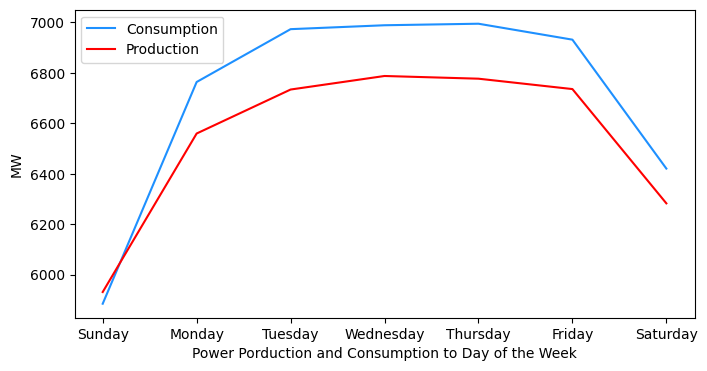

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(dfbyDay.index, dfbyDay['Consumption'], 'dodgerblue')
plt.plot(dfbyDay.index, dfbyDay['Production'], 'r')
plt.xlabel('Power Porduction and Consumption to Day of the Week')
plt.ylabel('MW')
plt.legend(['Consumption', 'Production'])

plt.show()


In [ ]:
# Mengelompokkan data berdasarkan hari (day_of_week) dan menghitung median untuk konsumsi dan produksi
grphr_day = df.groupby('day_of_week')[['Consumption', 'Production']].mean()

# Menghitung low peak (nilai median terendah) dan high peak (nilai median tertinggi) untuk konsumsi
low_peak_consumption = grphr_day['Consumption'].min()
high_peak_consumption = grphr_day['Consumption'].max()

# Menghitung low peak (nilai median terendah) dan high peak (nilai median tertinggi) untuk produksi
low_peak_production = grphr_day['Production'].min()
high_peak_production = grphr_day['Production'].max()

# Mencetak low peak dan high peak untuk konsumsi
print("Low Peak Konsumsi :", low_peak_consumption)
print("High Peak Konsumsi :", high_peak_consumption)

# Mencetak low peak dan high peak untuk produksi
print("Low Peak Produksi :", low_peak_production)
print("High Peak Produksi :", high_peak_production)


Low Peak Konsumsi : 5885.0397338403045
High Peak Konsumsi : 6994.485540334856
Low Peak Produksi : 5931.378707224335
High Peak Produksi : 6787.381849315068


##Power Consumption by Month

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dfbyMonth = df.groupby('month').mean()
dfbyMonth = dfbyMonth.loc[ordered_months]

<ipython-input-23-84e7d358661f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfbyMonth = df.groupby('month').mean()


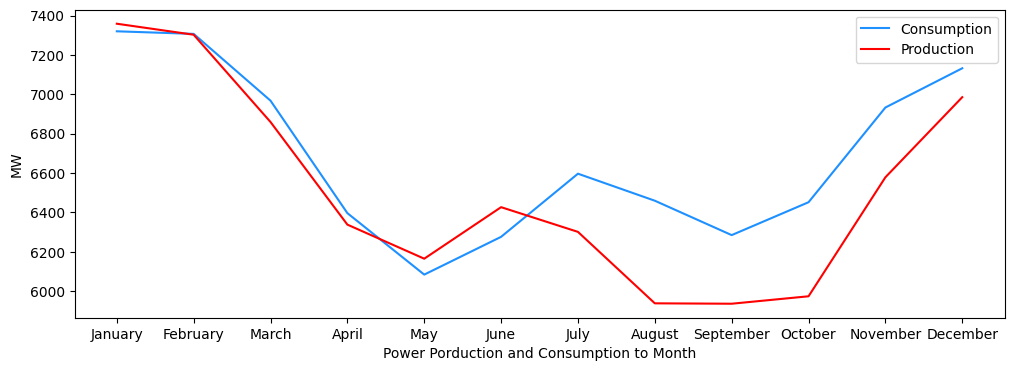

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(dfbyMonth.index, dfbyMonth['Consumption'], 'dodgerblue')
plt.plot(dfbyMonth.index, dfbyMonth['Production'], 'r')
plt.xlabel('Power Porduction and Consumption to Month')
plt.ylabel('MW')
plt.legend(['Consumption', 'Production'])
plt.show()

In [ ]:
# Mengelompokkan data berdasarkan bulan dan menghitung median untuk konsumsi dan produksi
grphr_month = df.groupby('month')[['Consumption', 'Production']].mean()

# Menghitung low peak (nilai median terendah) dan high peak (nilai median tertinggi) untuk konsumsi
low_peak_consumption = grphr_month['Consumption'].min()
high_peak_consumption = grphr_month['Consumption'].max()

# Menghitung low peak (nilai median terendah) dan high peak (nilai median tertinggi) untuk produksi
low_peak_production = grphr_month['Production'].min()
high_peak_production = grphr_month['Production'].max()

# Mencetak low peak dan high peak untuk konsumsi
print("Low Peak Konsumsi :", low_peak_consumption)
print("High Peak Konsumsi :", high_peak_consumption)

# Mencetak low peak dan high peak untuk produksi
print("Low Peak Produksi :", low_peak_production)
print("High Peak Produksi :", high_peak_production)

Low Peak Konsumsi : 6083.779233870968
High Peak Konsumsi : 7319.844086021505
Low Peak Produksi : 5935.865625
High Peak Produksi : 7358.32688172043


##Power Consumption by Year

In [ ]:
dfbyYear = df.groupby('year').mean()

<ipython-input-26-1bf932a734f8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfbyYear = df.groupby('year').mean()


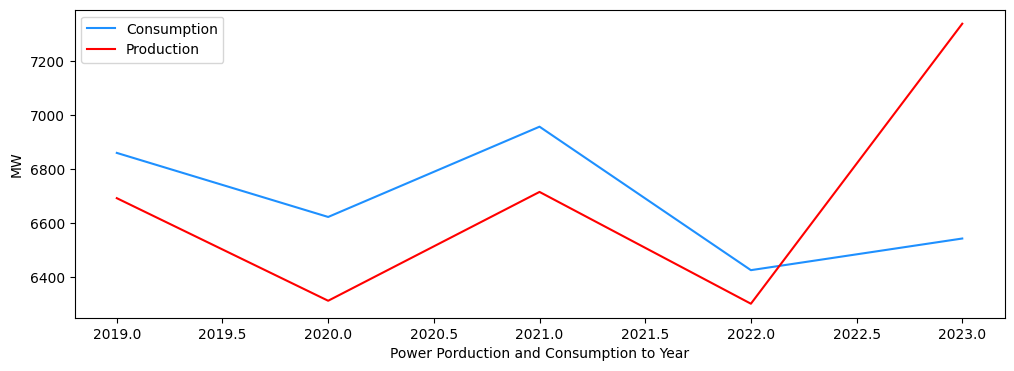

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(dfbyYear.index, dfbyYear['Consumption'], 'dodgerblue')
plt.plot(dfbyYear.index, dfbyYear['Production'], 'r')
plt.xlabel('Power Porduction and Consumption to Year')
plt.ylabel('MW')
plt.legend(['Consumption', 'Production'])
plt.show()

In [ ]:
# Mengelompokkan data berdasarkan tahun dan menghitung median untuk konsumsi dan produksi
grphr_year = df.groupby('year')[['Consumption', 'Production']].mean()

# Menghitung low peak (nilai median terendah) dan high peak (nilai median tertinggi) untuk konsumsi
low_peak_consumption = grphr_year['Consumption'].min()
high_peak_consumption = grphr_year['Consumption'].max()

# Menghitung low peak (nilai median terendah) dan high peak (nilai median tertinggi) untuk produksi
low_peak_production = grphr_year['Production'].min()
high_peak_production = grphr_year['Production'].max()

# Mencetak low peak dan high peak untuk konsumsi
print("Low Peak Konsumsi :", low_peak_consumption)
print("High Peak Konsumsi :", high_peak_consumption)

# Mencetak low peak dan high peak untuk produksi
print("Low Peak Produksi :", low_peak_production)
print("High Peak Produksi :", high_peak_production)


Low Peak Konsumsi : 6425.775938819769
High Peak Konsumsi : 6956.352927747974
Low Peak Produksi : 6301.651637940874
High Peak Produksi : 7337.149647887324


#Data Preprocessing

#Features Engineering by Time index

In [ ]:
df.drop(["Production", "Nuclear", "Wind", "Hydroelectric", "Oil and Gas", "Coal", "Solar", "Biomass"], axis=1, inplace=True)

In [ ]:
#method adding time features by time index
def createTimeFeatures(df):
    df["hour"] = df.index.hour
    df["day_of_week"] = df.index.day_of_week
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["day_of_year"] = df.index.dayofyear

createTimeFeatures(df)

df.head()

,Consumption,hour,day_of_week,quarter,month,year,day_of_year
DateTime,,,,,,,
2019-01-01 00:00:00,6352,0,1,1,1,2019,1
2019-01-01 01:00:00,6116,1,1,1,1,2019,1
2019-01-01 02:00:00,5873,2,1,1,1,2019,1
2019-01-01 03:00:00,5682,3,1,1,1,2019,1
2019-01-01 04:00:00,5557,4,1,1,1,2019,1


dataframe in train and test

cutOffDate 2022-03-13 01:00:00
train size: 28013 and test 8759


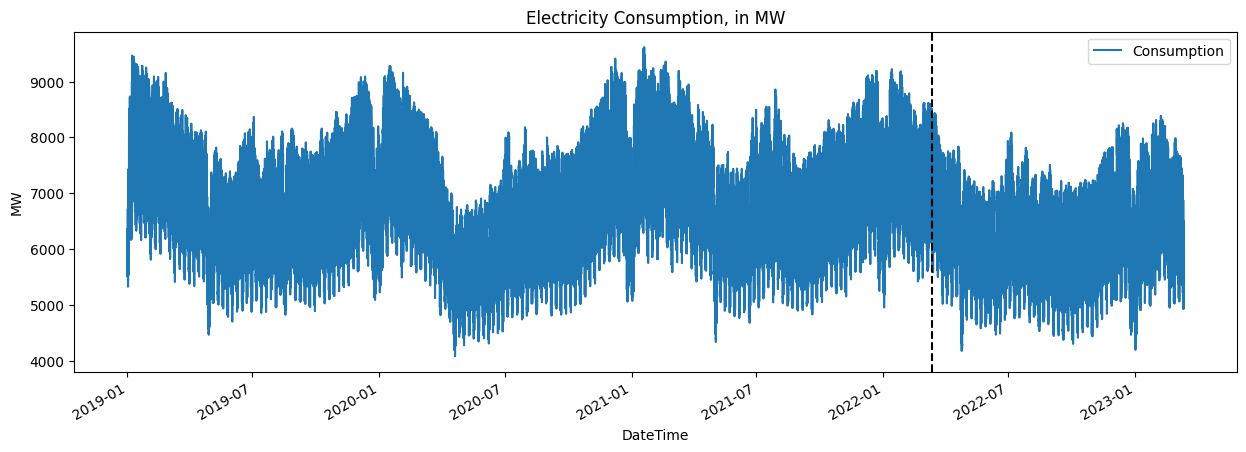

In [ ]:
cutOffDate = df.index[-365 * 24]
print(f"cutOffDate {cutOffDate}")

train = df.loc[df.index <= cutOffDate]
test = df.loc[df.index > cutOffDate]

print(f"train size: {len(train)} and test {len(test)}")

df[["Consumption"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption, in MW")
plt.ylabel('MW')
plt.axvline(x=cutOffDate, color='black', ls='--')
plt.show()

#calculated the error percentage

In [ ]:
def meanAbsolutErrorAaPercentage(real, predicted):
    real = np.array(real)
    predicted = np.array(predicted)

    return np.mean(np.abs((real - predicted) / real)) * 100

#Model Training

##Forecasting XGBoost Model

In [ ]:
# define our features and our target as separate arrays
FEATURES = ["hour", "day_of_week", "quarter", "month", "year", "day_of_year"]
TARGET = "Consumption"

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# define and XGB regressor, fit it on our train data and use it to predict our test data
regressor = xgb.XGBRegressor(n_estimators=1000, early_stoppin_rounds=50, learning_rate=0.01)

regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100)
regressorOutput = regressor.predict(X_test)

prediction = pd.DataFrame(data=regressorOutput, index=X_test.index, columns=["prediction"])

df = df.merge(prediction, how="left", left_index=True, right_index=True)

# our predictions are at the end of the dataframe, so we should print that
df.tail()

[0]	validation_0-rmse:1032.79699	validation_1-rmse:1045.39781


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:25:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stoppin_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:538.51188	validation_1-rmse:735.28616
[200]	validation_0-rmse:374.82591	validation_1-rmse:705.28202
[300]	validation_0-rmse:311.97531	validation_1-rmse:705.39659
[400]	validation_0-rmse:271.83271	validation_1-rmse:706.39158
[500]	validation_0-rmse:245.75869	validation_1-rmse:704.59735
[600]	validation_0-rmse:228.38289	validation_1-rmse:711.96299
[700]	validation_0-rmse:216.29585	validation_1-rmse:717.11446
[800]	validation_0-rmse:206.56454	validation_1-rmse:719.41389
[900]	validation_0-rmse:197.41312	validation_1-rmse:718.73906
[999]	validation_0-rmse:190.22871	validation_1-rmse:720.89060


,Consumption,hour,day_of_week,quarter,month,year,day_of_year,prediction
DateTime,,,,,,,,
2023-03-12 19:00:00,6500,19,6,1,3,2023,71,7314.051758
2023-03-12 20:00:00,6471,20,6,1,3,2023,71,7323.088867
2023-03-12 21:00:00,6194,21,6,1,3,2023,71,7045.944336
2023-03-12 22:00:00,5708,22,6,1,3,2023,71,6621.527344
2023-03-12 23:00:00,5409,23,6,1,3,2023,71,6319.262695


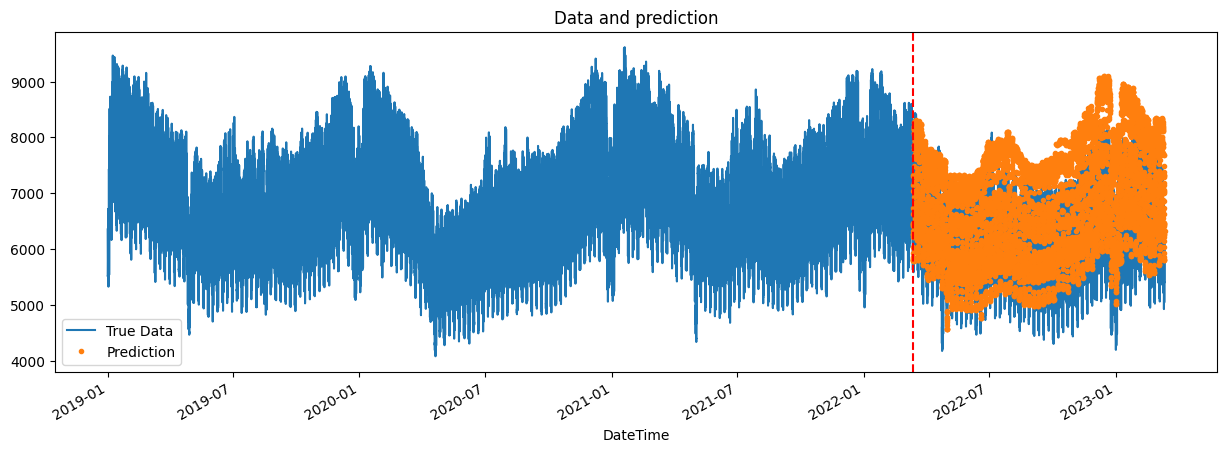

In [ ]:
ax = df[[TARGET]].plot(figsize=(15,5))
df["prediction"].plot(ax=ax, style=".")
ax.legend(["True Data", "Prediction"])
ax.set_title("Data and prediction")
plt.axvline(x=cutOffDate, color='red', ls='--')
plt.show()

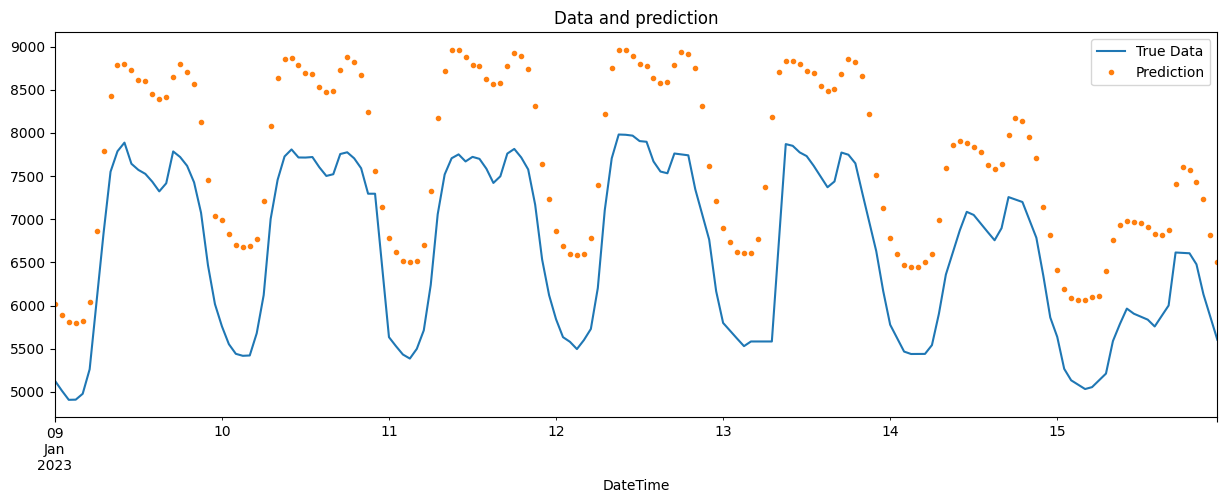

In [ ]:
ax = df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"][[TARGET]].plot(figsize=(15,5))
df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"]["prediction"].plot(ax=ax, style=".")
ax.legend(["True Data", "Prediction"])
ax.set_title("Data and prediction")
plt.show()

In [ ]:
testDf = df.loc[df.index > cutOffDate]
# Menghitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test, prediction)
print("Mean Squared Error (MSE):", mse)

# Menghitung MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, prediction)
print("Mean Absolute Error (MAE):", mae)

# Menghitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

yReal = testDf["Consumption"]
yPredicted = testDf["prediction"]
print(f"MAPE: {meanAbsolutErrorAaPercentage(yReal, yPredicted):.4f}")


Mean Squared Error (MSE): 519683.2584202273
Mean Absolute Error (MAE): 625.5373105631529
Root Mean Squared Error (RMSE): 720.8906008682783
MAPE: 10.2054


##Forecasting Prophet Model

In [ ]:
prophetTrain = train.reset_index()
prophetTrain.drop(FEATURES, axis=1, inplace=True)
prophetTrain.rename(columns={"DateTime": "ds", "Consumption": "y"}, inplace=True)

prophetTest = test.reset_index()
prophetTest.drop(FEATURES, axis=1, inplace=True)
prophetTest.rename(columns={"DateTime": "ds", "Consumption": "y"}, inplace=True)

print("Hasil terakhir dari prophetTrain:")
print(prophetTrain.tail())

print("\nHasil terakhir dari prophetTest:")
print(prophetTest.tail())



Hasil terakhir dari prophetTrain:
                       ds     y
28008 2022-03-12 21:00:00  7458
28009 2022-03-12 22:00:00  6912
28010 2022-03-12 23:00:00  6377
28011 2022-03-13 00:00:00  6119
28012 2022-03-13 01:00:00  5864

Hasil terakhir dari prophetTest:
                      ds     y
8754 2023-03-12 19:00:00  6500
8755 2023-03-12 20:00:00  6471
8756 2023-03-12 21:00:00  6194
8757 2023-03-12 22:00:00  5708
8758 2023-03-12 23:00:00  5409


In [ ]:
prophetModel = Prophet()
prophetModel.fit(prophetTrain)

prophetPrediction = prophetModel.predict(prophetTest)

yRealProphet = test["Consumption"]
yPredictedProphet = prophetPrediction["yhat"]


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_h85hmu1/dng0vi97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_h85hmu1/pe1ksd2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31914', 'data', 'file=/tmp/tmp_h85hmu1/dng0vi97.json', 'init=/tmp/tmp_h85hmu1/pe1ksd2k.json', 'output', 'file=/tmp/tmp_h85hmu1/prophet_model07f70fwb/prophet_model-20231017122542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:25:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:25:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


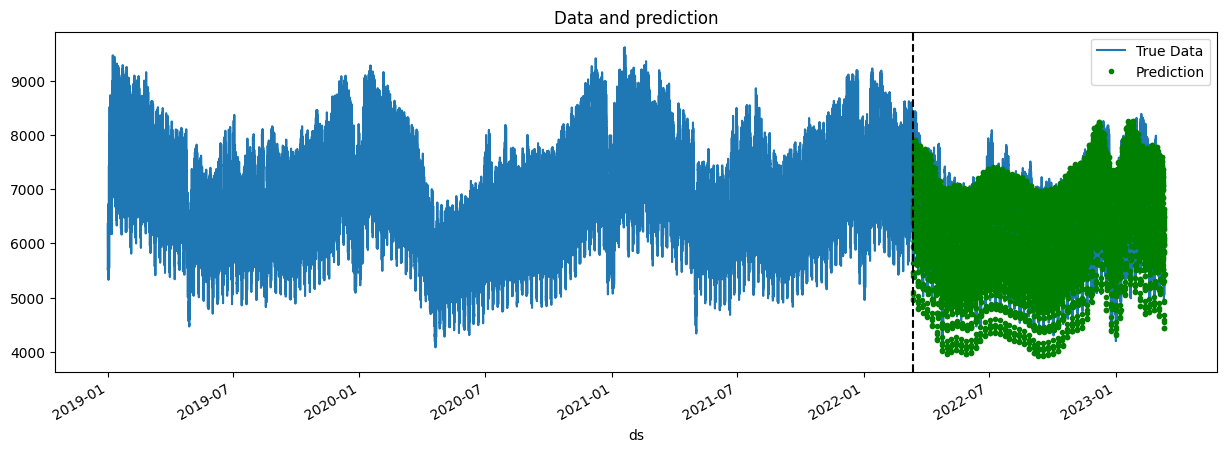

In [ ]:
prophetPrediction = prophetPrediction.set_index("ds")

ax = df[[TARGET]].plot(figsize=(15,5))
prophetPrediction["yhat"].plot(ax=ax, style=".", color="g")
ax.legend(["True Data", "Prediction"])
ax.set_title("Data and prediction")
plt.axvline(x=cutOffDate, color='black', ls='--')
plt.show()

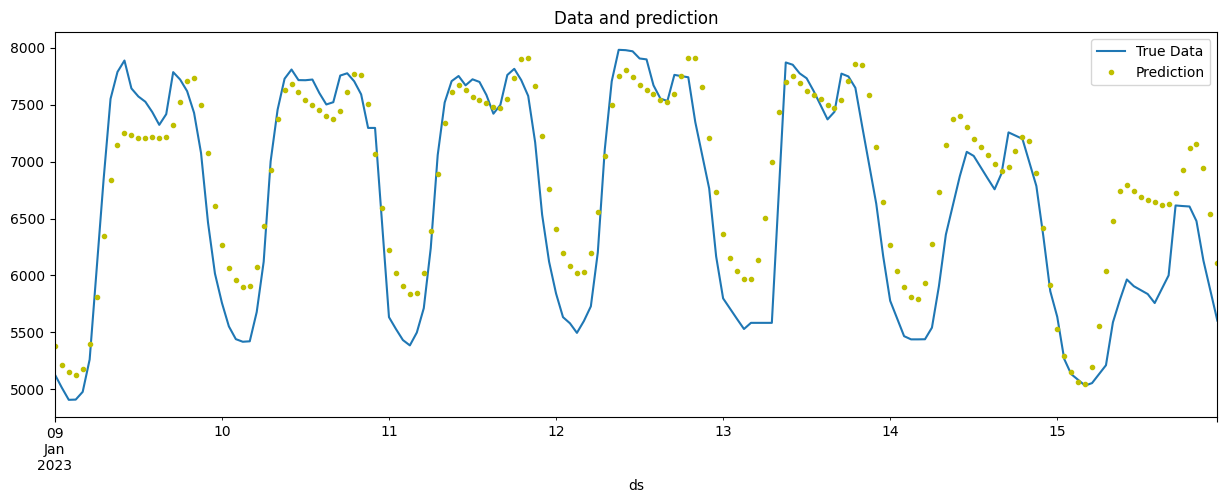

In [ ]:
ax = df["2023-01-09 00:00:00" : "2023-01-15 23:59:59"][[TARGET]].plot(figsize=(15,5))
prophetPrediction["2023-01-09 00:00:00" : "2023-01-15 23:59:59"]["yhat"].plot(ax=ax, style=".", color="y")
ax.legend(["True Data", "Prediction"])
ax.set_title("Data and prediction")
plt.show()

In [ ]:
mse_prophet = mean_squared_error(yRealProphet, yPredictedProphet)
print("Mean Squared Error (MSE):", mse_prophet)

# Menghitung MAE (Mean Absolute Error)
mae_prophet = mean_absolute_error(yRealProphet, yPredictedProphet)
print("Mean Absolute Error (MAE):", mae_prophet)

# Menghitung RMSE (Root Mean Squared Error)
rmse_prophet = np.sqrt(mse_prophet)
print("Root Mean Squared Error (RMSE):", rmse_prophet)

print(f"prophet mean absolut percentage error: {meanAbsolutErrorAaPercentage(yRealProphet, yPredictedProphet):.4f}")

Mean Squared Error (MSE): 189513.82958846222
Mean Absolute Error (MAE): 332.3354376653698
Root Mean Squared Error (RMSE): 435.3318614441886
prophet mean absolut percentage error: 5.4776
